# USD MSADS 505 Final Project - Team 3
# Caleb McCurdy, Jesse Gutierrez, and Jessica Hin

Importing required libraries and packages

In [1]:
import klib
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import xgboost as xgb
import statsmodels.api as sma


%matplotlib inline
from klib import corr_plot
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


from scipy.stats import yeojohnson
#import tensorflow as tf
#from tensorflow import keras

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

This code chunk is to prevent lenghty warning messages from appearing during notebook rendering.

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


# Part 1 - EDA
## Describing the data and data information

In [3]:
# Load the bank-full spreadsheet
df = pd.read_csv('C:/Users/jessh/Documents/ADS505_Team3/bank-full.csv', delimiter= ';')
# Display the first 5 rows to preview table
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Display the dimension of the spreadsheet
df.shape

(45211, 17)

In [5]:
# Display column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Display the data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
# Display null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Display unique outputs
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

Identifying which variables are numeric and which ones are catgorical.

In [10]:
# create subsets of the variables by type
num_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# updating objects to categorical type
df[cat_vars] = df[cat_vars].astype('category') 

In [11]:
# Subset the data to only have the numeric data
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Display the header
numeric_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


## Visualizations the numeric variables  
### Boxplots

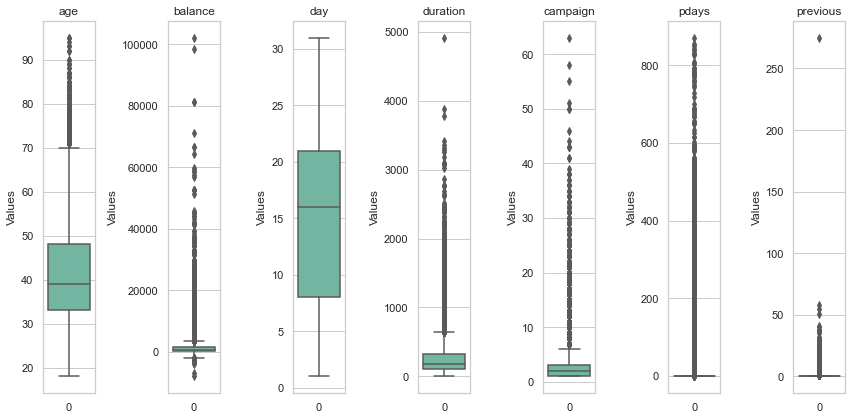

In [12]:
# Establish the style for the plots
sns.set(style="whitegrid")

# Create separate boxplots for each numeric column
plt.figure(figsize=(12, 6))

# Create a loop to generate independent subplots
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(1, len(numeric_df.columns), i)
    sns.boxplot(data=numeric_df[col], orient="v", palette="Set2")
    plt.title(f'{col}')
    plt.ylabel('Values')
# Combine & display outputs
plt.tight_layout()
plt.show()

### Scatterplots

### Histograms

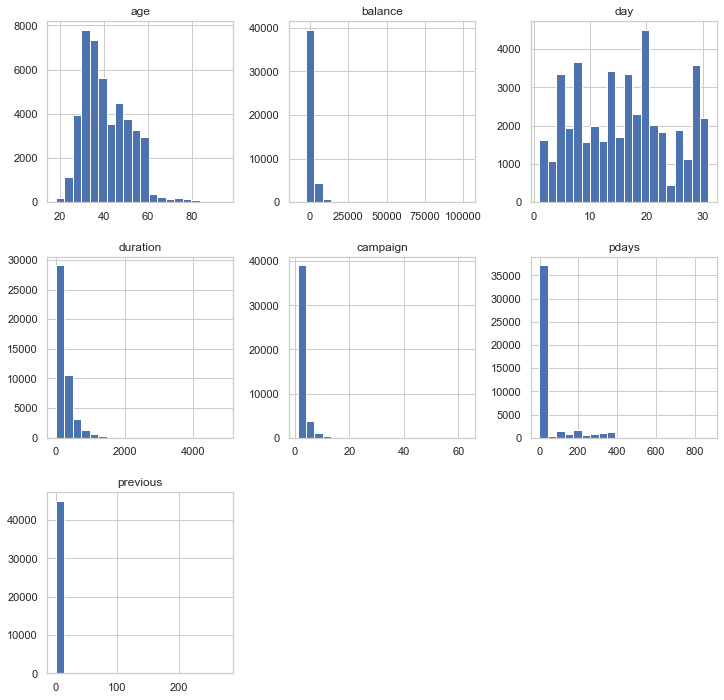

In [13]:
df[num_vars].hist(figsize=(12,12),bins=20)
plt.show()

### Correlation Plot

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

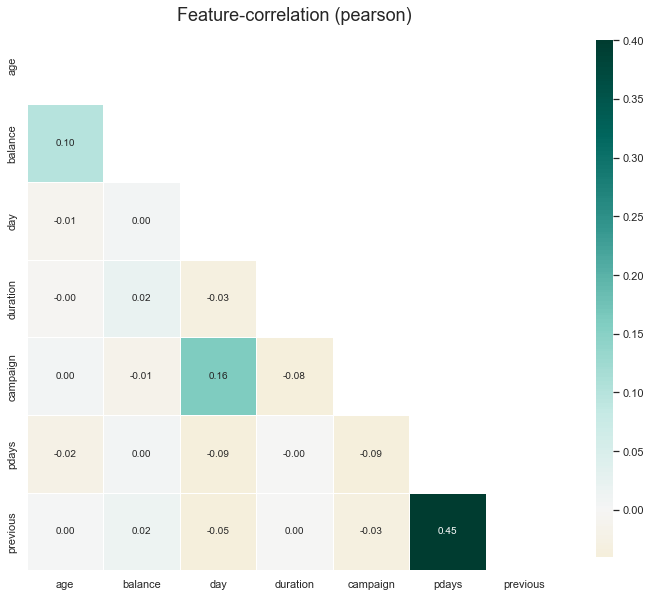

In [14]:
klib.corr_plot(df[num_vars])

## Visualizations of the categorical variables  
### Histograms with respect to the response variable 'y'

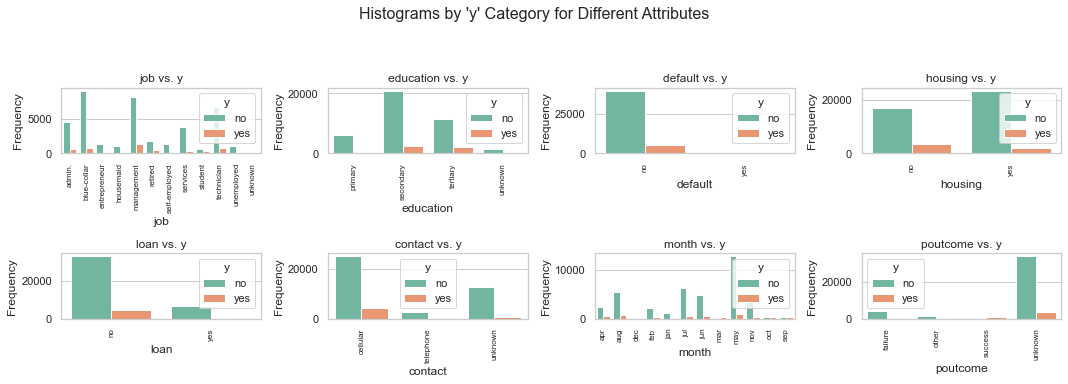

In [15]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# List of columns to include in the grid
columns_to_compare = ['job', 'education', 'default', 'housing', 'loan', 'contact',
                      'month', 'poutcome']

# Create a grid of histograms comparing each column to 'y'
num_rows = 5
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle("Histograms by 'y' Category for Different Attributes", fontsize=16)

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through the specified columns and create histograms for each
for i, col in enumerate(columns_to_compare):
    ax = axes[i]
    
    # Rotate x-axis labels by 45 degrees and set a smaller font size
    sns.countplot(data=df, x=col, hue='y', ax=ax, palette="Set2")
    ax.set_title(f'{col} vs. y')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    
# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

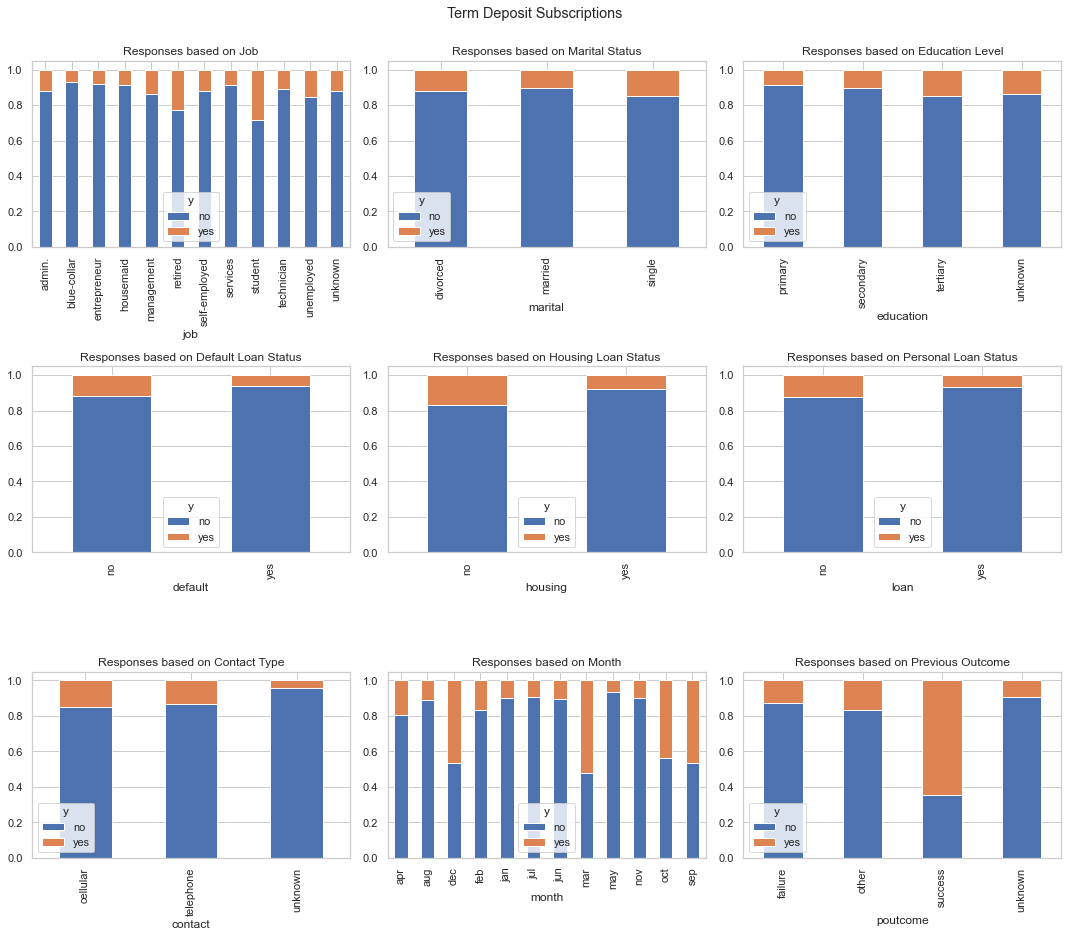

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))
fig.suptitle('Term Deposit Subscriptions', y=1)

# plotting by job
ax0 = pd.crosstab(df['job'], df['y'])
ax0 = ax0.div(ax0.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[0][0])
ax0.set_title('Responses based on Job')

# plotting by marital
ax1 = pd.crosstab(df['marital'], df['y'])
ax1 = ax1.div(ax1.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[0][1])
ax1.set_title('Responses based on Marital Status')

# plotting by education
ax2 = pd.crosstab(df['education'], df['y'])
ax2 = ax2.div(ax2.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[0][2])
ax2.set_title('Responses based on Education Level')

# plotting by default
ax3 = pd.crosstab(df['default'], df['y'])
ax3 = ax3.div(ax3.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[1][0])
ax3.set_title('Responses based on Default Loan Status')

# plotting by housing
ax4 = pd.crosstab(df['housing'], df['y'])
ax4 = ax4.div(ax4.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[1][1])
ax4.set_title('Responses based on Housing Loan Status')

# plotting by loan
ax5 = pd.crosstab(df['loan'], df['y'])
ax5 = ax5.div(ax5.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[1][2])
ax5.set_title('Responses based on Personal Loan Status')

# plotting by contact
ax6 = pd.crosstab(df['contact'], df['y'])
ax6 = ax6.div(ax6.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[2][0])
ax6.set_title('Responses based on Contact Type')

# plotting by month
ax7 = pd.crosstab(df['month'], df['y'])
ax7 = ax7.div(ax7.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[2][1])
ax7.set_title('Responses based on Month')

# plotting by poutcome
ax8 = pd.crosstab(df['poutcome'], df['y'])
ax8 = ax8.div(ax8.sum(1),axis = 0).plot(kind='bar', stacked = True, ax=axes[2][2])
ax8.set_title('Responses based on Previous Outcome')

plt.tight_layout()
plt.show()

### Boxplots of categorical variables with respect to y

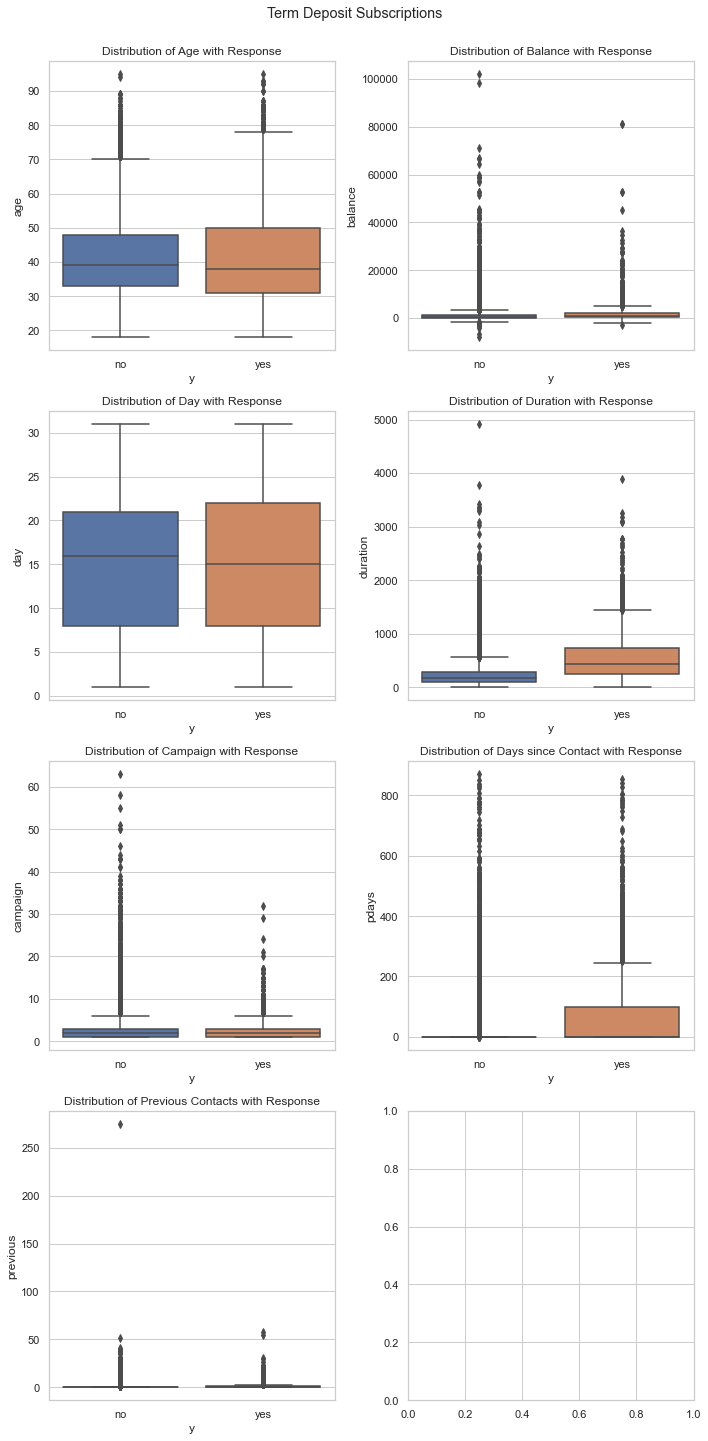

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))
fig.suptitle('Term Deposit Subscriptions', y=1)

# plotting by age
ax0 = sns.boxplot(y="age", x='y', data=df, ax = axes[0][0])
ax0.set_title('Distribution of Age with Response')

# plotting by balance
ax1 = sns.boxplot(y="balance", x='y', data=df, ax = axes[0][1])
ax1.set_title('Distribution of Balance with Response')

# plotting by day
ax2 = sns.boxplot(y="day", x='y', data=df, ax = axes[1][0])
ax2.set_title('Distribution of Day with Response')

# plotting by duration
ax3 = sns.boxplot(y="duration", x='y', data=df, ax = axes[1][1])
ax3.set_title('Distribution of Duration with Response')

# plotting by campaign
ax4 = sns.boxplot(y="campaign", x='y', data=df, ax = axes[2][0])
ax4.set_title('Distribution of Campaign with Response')

# plotting by pdays
ax5 = sns.boxplot(y="pdays", x='y', data=df, ax = axes[2][1])
ax5.set_title('Distribution of Days since Contact with Response')

# plotting by previous
ax6 = sns.boxplot(y="previous", x='y', data=df, ax = axes[3][0])
ax6.set_title('Distribution of Previous Contacts with Response')

plt.tight_layout()
plt.show()

## Visualizations for the records that had 'y' = Yes

In [18]:
# Categorical columns to analyze
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'previous', 'poutcome']

# Varaible used to store the results
results = []

# Iterate through the categorical columns
for col in categorical_columns:
    unique_values = df[col].unique()
    for value in unique_values:
        sub_df = df[df[col] == value]
        total_count = sub_df.shape[0]  
        yes_count = sub_df[sub_df['y'] == 'yes'].shape[0]
        percentage = (yes_count / total_count) * 100 if total_count > 0 else 0.0
        results.append({'Column': col, 'Value': value, 'Percentage': percentage, 'Total Frequency': total_count})

# Save the results as a Data Frame
result_df = pd.DataFrame(results)

# Sort results in descending order
result_df = result_df.sort_values(by='Percentage', ascending=False)

# Display top 20 unique values
result_df.head(20)

,Column,Value,Percentage,Total Frequency
126,previous,55,100.000000,1
122,previous,58,100.000000,1
132,poutcome,success,64.725347,1511
37,month,mar,51.991614,477
106,previous,26,50.000000,2
34,month,dec,46.728972,214
39,month,sep,46.459413,579
32,month,oct,43.766938,738
97,previous,10,38.805970,67
121,previous,30,33.333333,3


In [19]:
# Wanted to further look at the distribution among each attribute
month_df = result_df[result_df['Column'] == 'month']
# Display table
month_df

,Column,Value,Percentage,Total Frequency
37,month,mar,51.991614,477
34,month,dec,46.728972,214
39,month,sep,46.459413,579
32,month,oct,43.766938,738
38,month,apr,19.679400,2932
36,month,feb,16.647792,2649
31,month,aug,11.013286,6247
29,month,jun,10.222805,5341
33,month,nov,10.151134,3970
35,month,jan,10.121169,1403


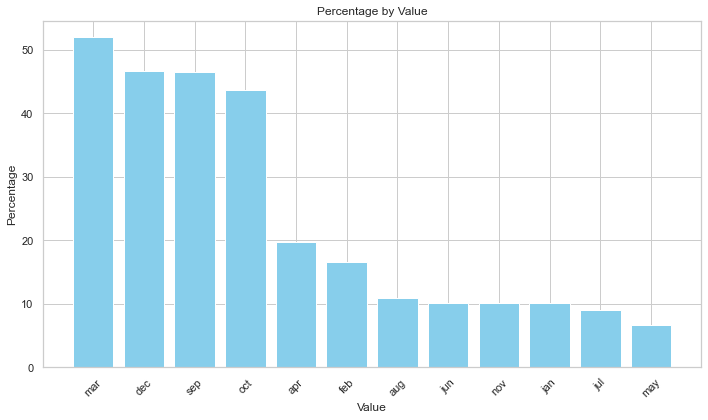

In [20]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(month_df['Value'], month_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [21]:
# Wanted to further look at the distribution among each attribute
marital_df = result_df[result_df['Column'] == 'marital']
# Display table
marital_df

,Column,Value,Percentage,Total Frequency
13,marital,single,14.949179,12790
14,marital,divorced,11.945458,5207
12,marital,married,10.123466,27214


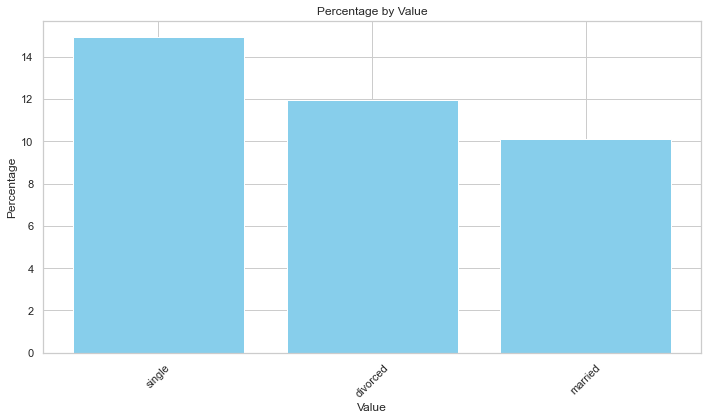

In [22]:
# Create bar plot for marital status
plt.figure(figsize=(10, 6))
plt.bar(marital_df['Value'], marital_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [23]:
# Wanted to further look at the distribution among each attribute
job_df = result_df[result_df['Column'] == 'job']
# Display table
job_df

,Column,Value,Percentage,Total Frequency
11,job,student,28.678038,938
5,job,retired,22.791519,2264
9,job,unemployed,15.502686,1303
0,job,management,13.755551,9458
6,job,admin.,12.202669,5171
8,job,self-employed,11.842939,1579
4,job,unknown,11.805556,288
1,job,technician,11.056996,7597
7,job,services,8.883004,4154
10,job,housemaid,8.790323,1240


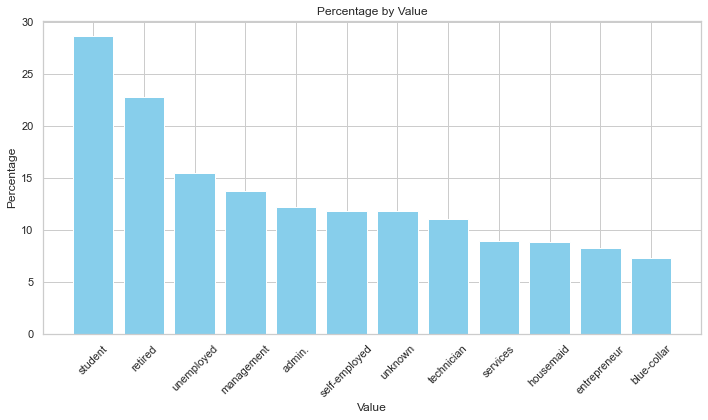

In [24]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(job_df['Value'], job_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [25]:
# Wanted to further look at the distribution among each attribute
education_df = result_df[result_df['Column'] == 'education']
# Display table
education_df

,Column,Value,Percentage,Total Frequency
15,education,tertiary,15.006390,13301
17,education,unknown,13.570275,1857
16,education,secondary,10.559435,23202
18,education,primary,8.626478,6851


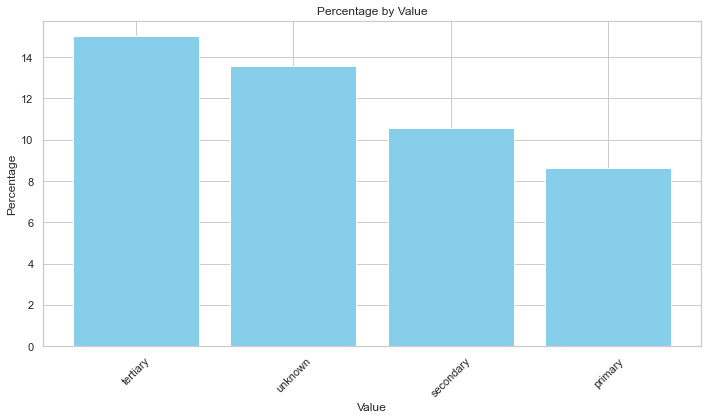

In [26]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(education_df['Value'], education_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [27]:
# Wanted to further look at the distribution among each attribute
default_df = result_df[result_df['Column'] == 'default']
# Display table
default_df

,Column,Value,Percentage,Total Frequency
19,default,no,11.796108,44396
20,default,yes,6.380368,815


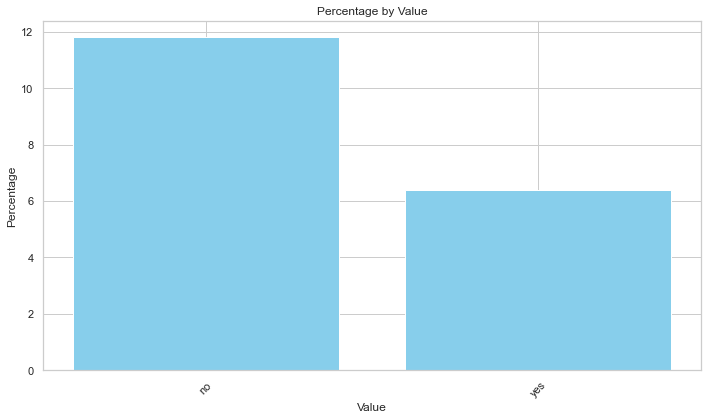

In [28]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(default_df['Value'], default_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [29]:
# Wanted to further look at the distribution among each attribute
housing_df = result_df[result_df['Column'] == 'housing']
# Display table
housing_df

,Column,Value,Percentage,Total Frequency
22,housing,no,16.702355,20081
21,housing,yes,7.699960,25130


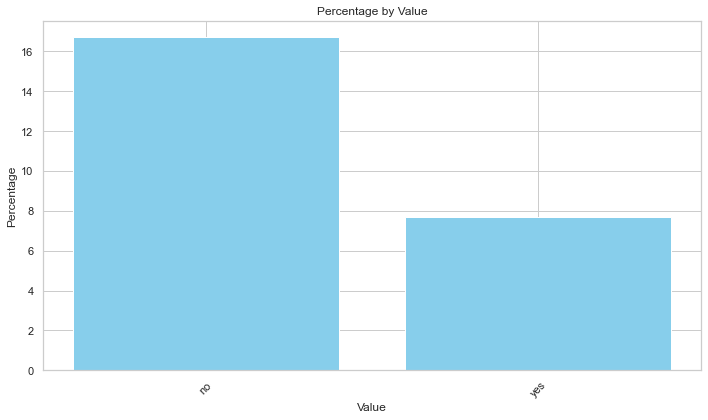

In [30]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(housing_df['Value'], housing_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [31]:
# Wanted to further look at the distribution among each attribute
loan_df = result_df[result_df['Column'] == 'loan']
# Display table
loan_df

,Column,Value,Percentage,Total Frequency
23,loan,no,12.655727,37967
24,loan,yes,6.681391,7244


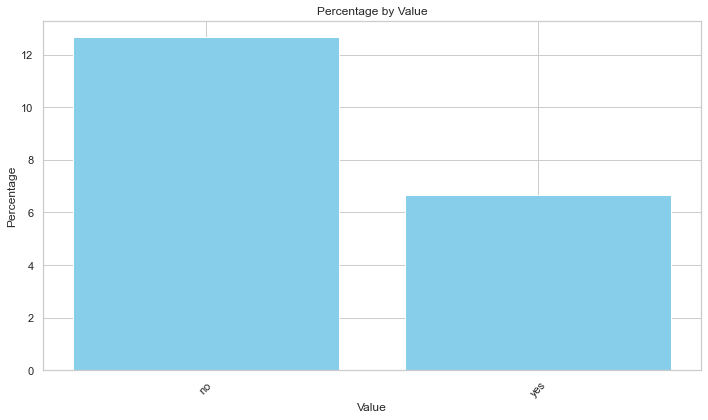

In [32]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(loan_df['Value'], loan_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [33]:
# Wanted to further look at the distribution among each attribute
contact_df = result_df[result_df['Column'] == 'contact']
# Display table
contact_df

,Column,Value,Percentage,Total Frequency
26,contact,cellular,14.918900,29285
27,contact,telephone,13.420509,2906
25,contact,unknown,4.070661,13020


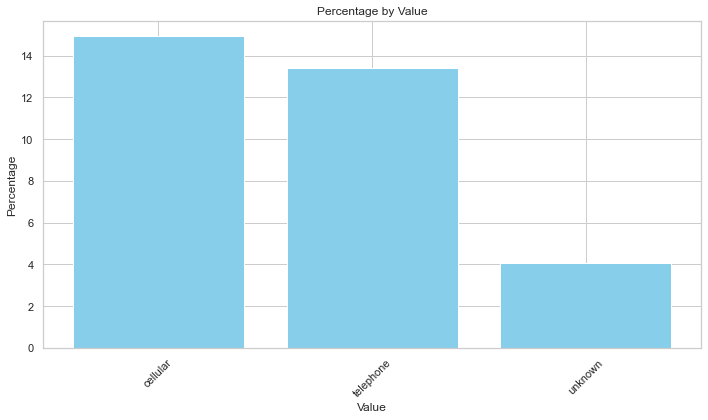

In [34]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(contact_df['Value'], contact_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [35]:
# Wanted to further look at the distribution among each attribute
campaign_df = result_df[result_df['Column'] == 'campaign']
# Display table
campaign_df

,Column,Value,Percentage,Total Frequency
40,campaign,1,14.597583,17544
41,campaign,2,11.203519,12505
42,campaign,3,11.193624,5521
57,campaign,32,11.111111,9
44,campaign,4,9.000568,3522
61,campaign,17,8.695652,69
50,campaign,11,7.960199,201
43,campaign,5,7.879819,1764
45,campaign,6,7.126259,1291
48,campaign,9,6.422018,327


In [36]:
# Determine the min. freq. to display w/in table using 5%
campaign_cutoff = round(len(campaign_df) * .05, 0)
# Display the minimum amount of observations that a value needs to be included
print('Minumum observations for campaign results: ', campaign_cutoff)
# Display table
campaign_cutoff_df = campaign_df[campaign_df['Total Frequency'] > campaign_cutoff] 
# Print updated table
campaign_cutoff_df

Minumum observations for campaign results:  2.0


,Column,Value,Percentage,Total Frequency
40,campaign,1,14.597583,17544
41,campaign,2,11.203519,12505
42,campaign,3,11.193624,5521
57,campaign,32,11.111111,9
44,campaign,4,9.000568,3522
61,campaign,17,8.695652,69
50,campaign,11,7.960199,201
43,campaign,5,7.879819,1764
45,campaign,6,7.126259,1291
48,campaign,9,6.422018,327


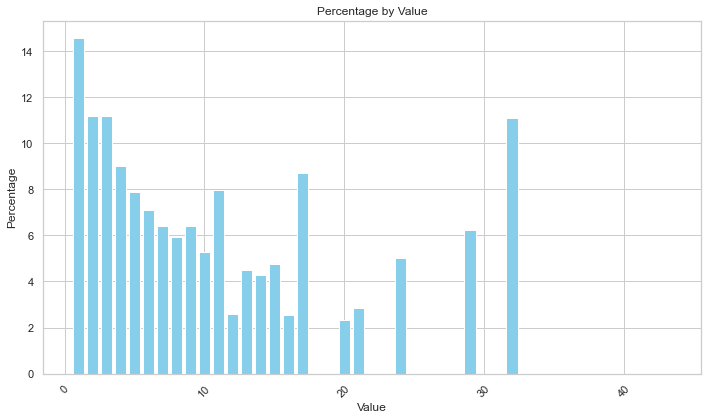

In [37]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(campaign_cutoff_df['Value'], campaign_cutoff_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [38]:
# Wanted to further look at the distribution among each attribute
previous_df = result_df[result_df['Column'] == 'previous']
# Display table
previous_df

,Column,Value,Percentage,Total Frequency
126,previous,55,100.000000,1
122,previous,58,100.000000,1
106,previous,26,50.000000,2
97,previous,10,38.805970,67
121,previous,30,33.333333,3
103,previous,8,30.232558,129
95,previous,6,29.963899,277
96,previous,5,26.361656,459
99,previous,7,26.341463,205
104,previous,14,26.315789,19


In [39]:
# Establish min. freq. based on cutoff value of 5%
percentage_cutoff = round(len(previous_df) * .05, 0)
# Display the min. amount of freq.
print('Percent cutoff: ', percentage_cutoff)
# Create a subset accounting for cutoff
previous_cutoff_df = previous_df[previous_df['Total Frequency'] > percentage_cutoff]
# Display results
previous_cutoff_df

Percent cutoff:  2.0


,Column,Value,Percentage,Total Frequency
97,previous,10,38.805970,67
121,previous,30,33.333333,3
103,previous,8,30.232558,129
95,previous,6,29.963899,277
96,previous,5,26.361656,459
99,previous,7,26.341463,205
104,previous,14,26.315789,19
101,previous,9,26.086957,92
89,previous,3,25.744308,1142
102,previous,21,25.000000,4


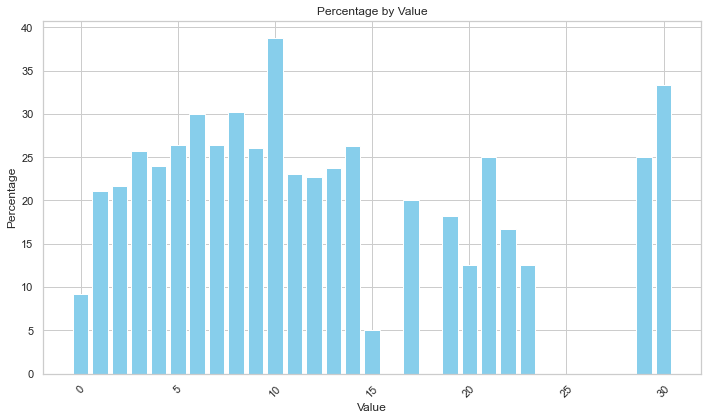

In [40]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(previous_cutoff_df['Value'], previous_cutoff_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [41]:
# Wanted to further look at the distribution among each attribute
poutcome_df = result_df[result_df['Column'] == 'poutcome']
# Display table
poutcome_df

,Column,Value,Percentage,Total Frequency
132,poutcome,success,64.725347,1511
131,poutcome,other,16.684783,1840
130,poutcome,failure,12.609671,4901
129,poutcome,unknown,9.161503,36959


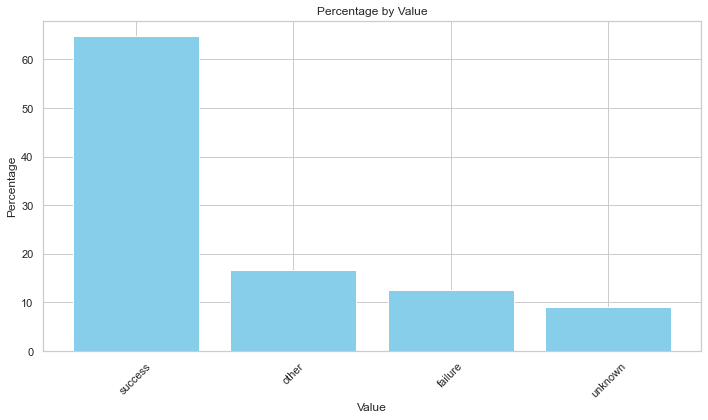

In [42]:
# Create bar plot for month attributee
plt.figure(figsize=(10, 6))
plt.bar(poutcome_df['Value'], poutcome_df['Percentage'], color='skyblue')
plt.xlabel('Value')
plt.ylabel('Percentage')
plt.title('Percentage by Value')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Part 2 - Data Preprocessing

The portion was added in below, not sure if Jesse wanted to get rid of the knn stuff or the 3 cells above the knn code portion. I'll mark the code cells that I have questions on (Jess) 

In [43]:
# replacing the -1 with 0 in the pdays variable
df['pdays'] = df['pdays'].replace(-1, 0)

## Split the dataset

In [44]:
# train (60%), validation (30%), test (10%) 
X = df.drop(columns=['y'])
y = df[['y']]
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size = 0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.25, random_state=1)

In [45]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
23520,34,technician,single,tertiary,yes,-6,no,no,cellular,28,aug,79,8,0,0,unknown
14941,58,housemaid,single,tertiary,no,145,yes,yes,cellular,16,jul,128,2,0,0,unknown
40686,38,admin.,married,tertiary,no,4297,no,no,cellular,7,aug,206,2,0,0,unknown
29432,32,self-employed,married,tertiary,no,428,no,yes,cellular,3,feb,142,2,0,0,unknown
840,49,blue-collar,married,secondary,no,64,yes,no,unknown,7,may,293,3,0,0,unknown


In [46]:
# using the yeojohnson transformation because it can take both negative and postive numbers
X_train[num_vars] = X_train[num_vars].apply(lambda x: yeojohnson(x)[0] , axis=0)
X_test[num_vars] = X_test[num_vars].apply(lambda x: yeojohnson(x)[0] , axis=0)
X_val[num_vars] = X_val[num_vars].apply(lambda x: yeojohnson(x)[0] , axis=0)

## Scaling

In [47]:
# Redefine cat_vars to not include the response variable
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create pipelines for cat and num variables
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])
num_pipe = Pipeline([('standardize', StandardScaler())])

# Combine pipelines using ColumnTransformer
all_pipe = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, cat_vars),
        ('num', num_pipe, num_vars)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_trans = all_pipe.fit_transform(X_train)

# Get feature names for one-hot encoded cat variables
cat_encoder = all_pipe.named_transformers_['cat'].named_steps['encoder']
cat_encoder.fit(X_train[cat_vars])

# get cat feature names
cat_col_names = cat_encoder.get_feature_names_out(cat_vars)

# all feature names
all_col_names = list(cat_col_names) + num_vars

# Reassign the column names to the transformed datasets
X_train_trans = pd.DataFrame(X_train_trans, columns=all_col_names)
X_val_trans = pd.DataFrame(all_pipe.transform(X_val), columns=all_col_names)
X_test_trans = pd.DataFrame(all_pipe.transform(X_test), columns=all_col_names)


In [48]:
X_train_trans

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.585290,-0.433445,1.376543,-0.886337,1.702620,-0.472660,-0.472783
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.472928,-0.334094,0.106335,-0.400598,0.125236,-0.472660,-0.472783
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.141070,1.076134,-1.047777,0.112729,0.125236,-0.472660,-0.472783
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.830866,-0.202331,-1.689641,-0.291592,0.125236,-0.472660,-0.472783
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.843488,-0.378788,-1.047777,0.515790,0.729904,-0.472660,-0.472783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.919889,0.315921,-0.129305,0.612370,0.729904,-0.472660,-0.472783
27122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.585290,-0.160072,0.220930,0.251362,0.125236,-0.472660,-0.472783
27123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.765233,1.045440,0.661153,0.770854,1.485425,-0.472660,-0.472783
27124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.518475,0.300144,0.553585,-2.528253,1.889098,-0.472660,-0.472783


In [49]:
X_train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27126 entries, 0 to 27125
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_admin.           27126 non-null  float64
 1   job_blue-collar      27126 non-null  float64
 2   job_entrepreneur     27126 non-null  float64
 3   job_housemaid        27126 non-null  float64
 4   job_management       27126 non-null  float64
 5   job_retired          27126 non-null  float64
 6   job_self-employed    27126 non-null  float64
 7   job_services         27126 non-null  float64
 8   job_student          27126 non-null  float64
 9   job_technician       27126 non-null  float64
 10  job_unemployed       27126 non-null  float64
 11  job_unknown          27126 non-null  float64
 12  marital_divorced     27126 non-null  float64
 13  marital_married      27126 non-null  float64
 14  marital_single       27126 non-null  float64
 15  education_primary    27126 non-null 

In [50]:
## Convert 'no' to 0 and 'yes' to 1 in y_train
y_train['y'] = y_train['y'].map({'no': 0, 'yes': 1})

## Balancing

In [51]:
# Combine the transformed X_train and y_train into a single DataFrame
X_train_trans.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
balanced_train_data = pd.concat([X_train_trans, y_train], axis=1)

# Separate the majority (0) and minority (1) classes
major_class = balanced_train_data[balanced_train_data['y'] == 0]
minor_class = balanced_train_data[balanced_train_data['y'] == 1]

In [52]:
balanced_train_data

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.585290,-0.433445,1.376543,-0.886337,1.702620,-0.472660,-0.472783,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.472928,-0.334094,0.106335,-0.400598,0.125236,-0.472660,-0.472783,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.141070,1.076134,-1.047777,0.112729,0.125236,-0.472660,-0.472783,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-0.830866,-0.202331,-1.689641,-0.291592,0.125236,-0.472660,-0.472783,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.843488,-0.378788,-1.047777,0.515790,0.729904,-0.472660,-0.472783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.919889,0.315921,-0.129305,0.612370,0.729904,-0.472660,-0.472783,0
27122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.585290,-0.160072,0.220930,0.251362,0.125236,-0.472660,-0.472783,0
27123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.765233,1.045440,0.661153,0.770854,1.485425,-0.472660,-0.472783,0
27124,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.518475,0.300144,0.553585,-2.528253,1.889098,-0.472660,-0.472783,0


### Oversampling minority class

In [53]:
# Oversample the minority class to match the number of majority class samples
minor_class_over = resample(minor_class, replace=True, n_samples=len(major_class), random_state=1)

# Combine the oversampled minority class with the majority class
train_data_over = pd.concat([major_class, minor_class_over])

# Separate the features (X) and the target (y) from the balanced training data
X_train_over = train_data_over.drop(columns=['y'])
y_train_over = train_data_over[['y']]

In [54]:
display(X_train_over)
display(y_train_over)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.585290,-0.433445,1.376543,-0.886337,1.702620,-0.472660,-0.472783
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.472928,-0.334094,0.106335,-0.400598,0.125236,-0.472660,-0.472783
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.830866,-0.202331,-1.689641,-0.291592,0.125236,-0.472660,-0.472783
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.843488,-0.378788,-1.047777,0.515790,0.729904,-0.472660,-0.472783
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.585290,0.067492,0.553585,0.155356,-1.114745,-0.472660,-0.472783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.094962,2.285978,0.333584,1.937783,-1.114745,-0.472660,-0.472783
24071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-2.210882,-0.175111,-1.515550,1.480010,-1.114745,-0.472660,-0.472783
10580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.960441,-0.315780,-0.250721,0.280283,0.125236,2.110895,2.145573
4898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.141070,-0.424220,-0.250721,1.243006,0.125236,-0.472660,-0.472783


,y
0,0
1,0
3,0
4,0
5,0
...,...
3792,1
24071,1
10580,1
4898,1


### Undersampling majority class

In [55]:
# undersample the minority class to match the number of majority class samples
major_class_under = resample(major_class, replace=True, n_samples=len(minor_class), random_state=1)

# Combine the oversampled minority class with the majority class
train_data_under = pd.concat([minor_class, major_class_under])

# Separate the features (X) and the target (y) from the balanced training data
X_train_under = train_data_under.drop(columns=['y'])
y_train_under = train_data_under[['y']]

In [56]:
display(X_train_under)
display(y_train_under)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.141070,1.076134,-1.047777,0.112729,0.125236,-0.472660,-0.472783
16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.518475,0.604624,1.376543,0.757472,0.125236,2.123786,2.019955
26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.690280,0.544217,0.333584,0.416164,-1.114745,-0.472660,-0.472783
30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.157689,-0.424220,0.220930,0.519787,1.086134,2.098396,2.174974
49,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.234786,0.778642,0.871895,-0.337129,-1.114745,2.128832,2.145573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.518475,1.073822,-0.766399,0.888964,-1.114745,-0.472660,-0.472783
7596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-1.094962,-0.282781,-0.374836,0.907223,-1.114745,-0.472660,-0.472783
8158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-2.029069,-0.001406,1.376543,0.079816,1.086134,-0.472660,-0.472783
17265,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.685040,1.725698,0.220930,-0.073400,0.125236,-0.472660,-0.472783


,y
2,1
16,1
26,1
30,1
49,1
...,...
17421,0
7596,0
8158,0
17265,0


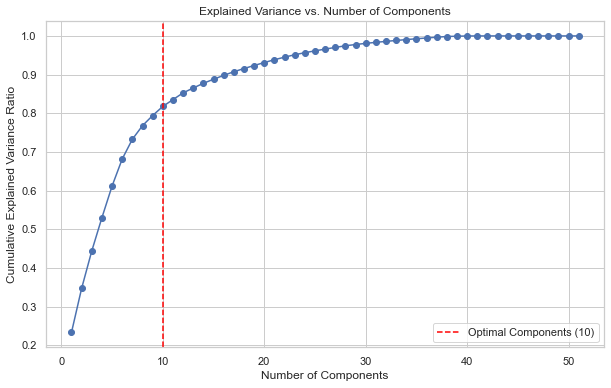

Optimal number of components: 10


In [57]:
# Initialize PCA with a large number of components
pca = PCA()

# Fit PCA on your scaled data
pca.fit(X_train_over)

# Plot the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title("Explained Variance vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)

# Determine the optimal number of components based on the plot
# You can choose a threshold (e.g., 0.95) and find the corresponding number of components
threshold = 0.8
optimal_num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

plt.axvline(x=optimal_num_components, color='red', linestyle='--', label=f'Optimal Components ({optimal_num_components})')
plt.legend()

plt.show()

print(f"Optimal number of components: {optimal_num_components}")

In [58]:
# I deemed 10 as the ideal number of components capturing >80% of cumulative explained variance
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_train_over)

# Convert to a DataFrame from X_pca w/ original column names
pca_column_names = [f'PC{i}' for i in range(1, 13)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_column_names)

# Create a dictionary to map PCA column names to original
pca_to_original_mapping = {pca_column_names[i]: X_train_over.columns[i] for i in range(12)}  # Start from 0

# Use the mapping to match PCA component names to original columns
matching_columns = [pca_to_original_mapping[pca_col] for pca_col in X_pca_df.columns]

# Rename column names
X_pca_df.rename(columns=pca_to_original_mapping, inplace=True)

# Add 'y' column from df_factors_imputed to X_pca_df
X_pca_df['y'] = np.array(y_train_over)

# Display table
X_pca_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,y
0,-1.293388,-0.642563,-2.079908,1.344201,0.288192,0.812507,-1.284592,0.012725,0.386305,-0.446589,-0.336996,-0.106938,0
1,-1.035149,0.837080,-0.881557,-0.448694,0.243281,-0.113452,-0.245657,0.757437,-0.015587,-1.527236,1.257080,0.424067,0
2,-0.880939,-0.516435,-0.124817,-1.211134,-1.133665,0.965536,-0.984189,0.085789,-0.856150,0.444189,1.072314,0.039149,0
3,-1.190538,0.577649,-0.011655,-1.228694,0.450997,0.887452,1.455187,0.060991,0.332890,0.370314,-0.303817,-0.072623,0
4,-1.069025,-0.479240,-0.067953,-0.054373,-0.230760,-1.286239,1.179718,0.641224,0.119247,0.983531,-0.249065,0.360571,0


In [59]:
# Display the dimensions of the dataset
X_pca_df.shape

(47870, 13)

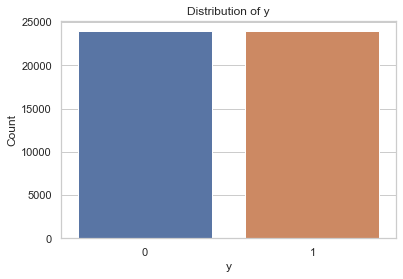

In [60]:
# Display distribution of response variable
sns.countplot(data=X_pca_df, x='y')
plt.xlabel('y')
plt.ylabel('Count')
plt.title('Distribution of y')
plt.show()

## Model Development

### AdaBoost Model with oversampled data set

In [61]:
## Convert 'no' to 0 and 'yes' to 1 in y_val
y_val['y'] = y_val['y'].map({'no': 0, 'yes': 1})

In [62]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels 
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
learn_rate = [0.01,0.1]

# a grid for the randoms search to search through
random_grid = {'n_estimators': n_estimators,
               'base_estimator__max_depth': max_depth,
               'base_estimator__min_samples_split': min_samples_split,
               'base_estimator__min_samples_leaf': min_samples_leaf,
               'learning_rate': learn_rate}


# spcifying the model
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# searching through the hyperparamters with cv of 5
boost_random = RandomizedSearchCV(estimator = boost,
                               param_distributions = random_grid,
                               n_iter = 15, 
                               cv = 5, 
                               verbose=3, 
                               random_state=35, 
                               n_jobs = -1)

# fitting the model
boost_random.fit(X_train_over,y_train_over)

#getting the best hyper parameters
print(boost_random.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=60,
                                                         min_samples_split=10),
                   learning_rate=0.1, n_estimators=19)


**Validation Data**

In [63]:
#X_val_new = X_val_trans[X_pca_df.columns]
y_val_pred = boost_random.predict(X_val_trans)

In [64]:
y_val

,y
7174,0
19127,0
44931,1
3873,0
40674,0
...,...
24703,0
7922,1
32673,0
29152,0


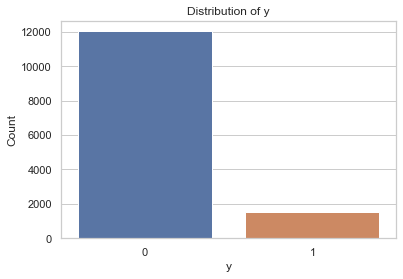

In [65]:
# Display distribution of predictor variable
sns.countplot(y_val['y'])
plt.xlabel('y')
plt.ylabel('Count')
plt.title('Distribution of y')
plt.show()

Validation Accuracy: 0.8965568089655681
Confusion Matrix:
 [[11684   354]
 [ 1049   476]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     12038
           1       0.57      0.31      0.40      1525

    accuracy                           0.90     13563
   macro avg       0.75      0.64      0.67     13563
weighted avg       0.88      0.90      0.88     13563

ROC AUC Score: 0.8875013005264748


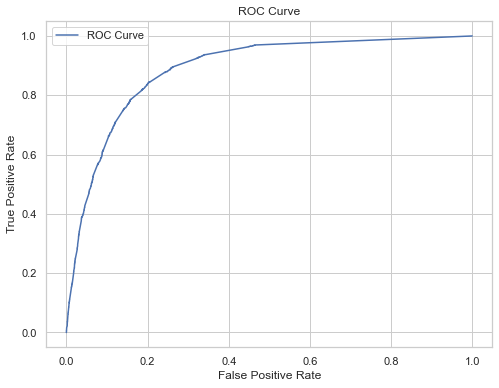

In [66]:
# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = boost_random.predict_proba(X_val_trans)[:, 1]
roc_auc = roc_auc_score(y_val, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Test data set**

Validation Accuracy: 0.8909774436090225
Confusion Matrix:
 [[3849  100]
 [ 393  180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      3949
           1       0.64      0.31      0.42       573

    accuracy                           0.89      4522
   macro avg       0.78      0.64      0.68      4522
weighted avg       0.87      0.89      0.87      4522

ROC AUC Score: 0.9031683192820151


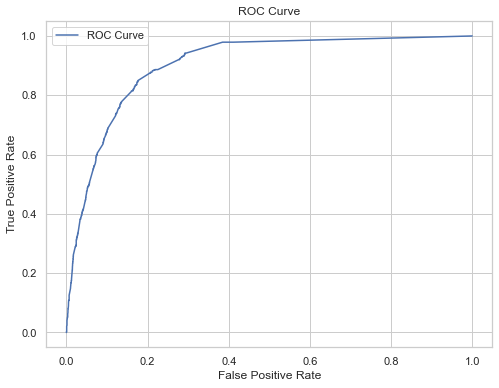

In [67]:
## Convert 'no' to 0 and 'yes' to 1 in y_test
y_test['y'] = y_test['y'].map({'no': 0, 'yes': 1})

#predicting values
y_test_pred = boost_random.predict(X_test_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = boost_random.predict_proba(X_test_trans)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### AdaBoost Model with original data set

Fitting 5 folds for each of 15 candidates, totalling 75 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=120,
                                                         min_samples_leaf=4,
                                                         min_samples_split=10),
                   learning_rate=0.01, n_estimators=17)
Validation Accuracy: 0.8986212489862125
Confusion Matrix:
 [[11573   465]
 [  910   615]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     12038
           1       0.57      0.40      0.47      1525

    accuracy                           0.90     13563
   macro avg       0.75      0.68      0.71     13563
weighted avg       0.89      0.90      0.89     13563

ROC AUC Score: 0.8910725326084885


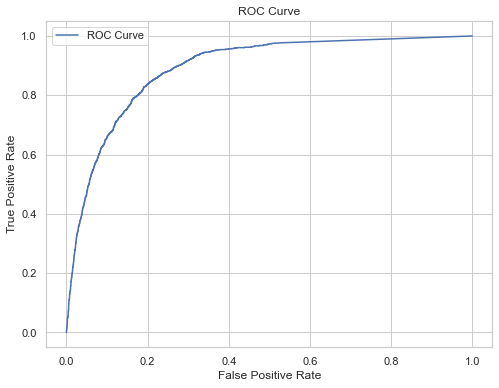

In [68]:
# fitting the model
boost_random.fit(X_train_trans,y_train)

#getting the best hyper parameters
print(boost_random.best_estimator_)

#predicting values
y_val_pred = boost_random.predict(X_val_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = boost_random.predict_proba(X_val_trans)[:, 1]
roc_auc = roc_auc_score(y_val, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Validation Accuracy: 0.8883237505528527
Confusion Matrix:
 [[3787  162]
 [ 343  230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3949
           1       0.59      0.40      0.48       573

    accuracy                           0.89      4522
   macro avg       0.75      0.68      0.71      4522
weighted avg       0.88      0.89      0.88      4522

ROC AUC Score: 0.9005606827363013


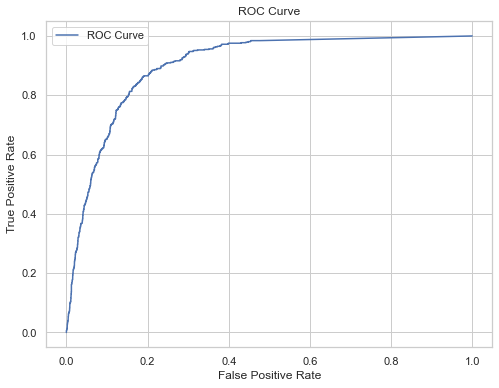

In [69]:
#predicting values
y_test_pred = boost_random.predict(X_test_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = boost_random.predict_proba(X_test_trans)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Logistic Regression with over sampled training data

In [70]:
# building the model for the over sampled training data
logreg_over = LogisticRegressionCV(solver = 'lbfgs', cv = 5, max_iter = 500).fit(X_train_over,y_train_over)

# coefficients for the model
coeff_over = pd.DataFrame({'coeff': logreg_over.coef_[ 0], 'abs_coeff': np.abs(logreg_over.coef_[0])}, index = X_train_over.columns)
print(coeff_over.sort_values(by = ['abs_coeff'], ascending = False))

                        coeff  abs_coeff
duration             1.824378   1.824378
month_mar            1.793798   1.793798
month_jan           -1.584776   1.584776
month_oct            1.461198   1.461198
previous             1.350020   1.350020
poutcome_failure    -1.203025   1.203025
poutcome_success     1.172266   1.172266
poutcome_other      -1.083146   1.083146
month_jul           -1.073100   1.073100
contact_unknown     -1.053905   1.053905
month_sep            1.042087   1.042087
poutcome_unknown     0.946969   0.946969
month_nov           -0.934347   0.934347
month_aug           -0.865960   0.865960
month_may           -0.678718   0.678718
job_retired          0.579703   0.579703
job_student          0.564075   0.564075
month_dec            0.505178   0.505178
housing_yes         -0.489835   0.489835
contact_telephone    0.446404   0.446404
contact_cellular     0.440565   0.440565
pdays               -0.416009   0.416009
job_self-employed   -0.371362   0.371362
job_housemaid   

**Validation Data**

Validation Accuracy: 0.8492221484922214
Confusion Matrix:
 [[10341  1697]
 [  348  1177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     12038
           1       0.41      0.77      0.54      1525

    accuracy                           0.85     13563
   macro avg       0.69      0.82      0.72     13563
weighted avg       0.90      0.85      0.87     13563

ROC AUC Score: 0.9059101370251035


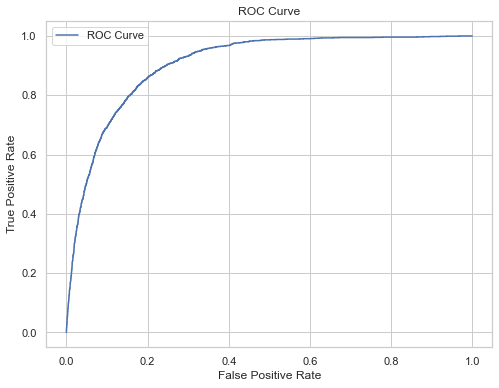

In [71]:
#log reg prediction
y_val_pred = logreg_over.predict(X_val_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = logreg_over.predict_proba(X_val_trans)[:, 1]
roc_auc = roc_auc_score(y_val, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Test Data**

Validation Accuracy: 0.8398938522777533
Confusion Matrix:
 [[3336  613]
 [ 111  462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      3949
           1       0.43      0.81      0.56       573

    accuracy                           0.84      4522
   macro avg       0.70      0.83      0.73      4522
weighted avg       0.90      0.84      0.86      4522

ROC AUC Score: 0.9055894593236541


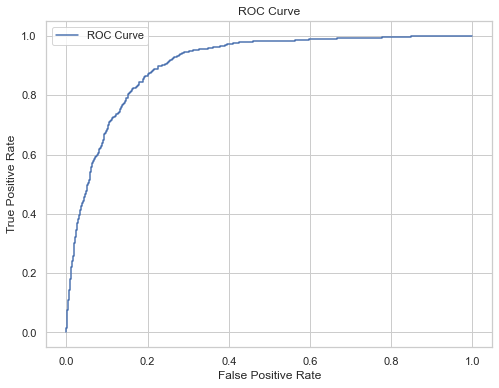

In [72]:
#log reg prediction for test data
y_test_pred = logreg_over.predict(X_test_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = logreg_over.predict_proba(X_test_trans)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Logistic Regression with original training data

In [73]:
# building a model with our original training data
logreg_orig = LogisticRegressionCV(solver = 'lbfgs', cv = 5, max_iter = 500, class_weight='balanced').fit(X_train_trans,y_train)

# coefficients for the model
coeff_orig = pd.DataFrame({'coeff': logreg_orig.coef_[ 0], 'abs_coeff': np.abs(logreg_orig.coef_[0])}, index = X_train_trans.columns)
print(coeff_orig.sort_values(by = ['abs_coeff'], ascending = False))

                        coeff  abs_coeff
month_mar            1.877510   1.877510
duration             1.845810   1.845810
previous             1.787963   1.787963
month_jan           -1.648831   1.648831
month_oct            1.461338   1.461338
poutcome_failure    -1.361124   1.361124
poutcome_unknown     1.336091   1.336091
poutcome_other      -1.263615   1.263615
month_jul           -1.110737   1.110737
contact_unknown     -1.104157   1.104157
poutcome_success     1.034650   1.034650
month_sep            1.005553   1.005553
month_nov           -0.972114   0.972114
month_aug           -0.896884   0.896884
month_may           -0.739000   0.739000
month_dec            0.676876   0.676876
pdays               -0.644825   0.644825
job_retired          0.615379   0.615379
job_student          0.607286   0.607286
housing_yes         -0.518160   0.518160
contact_telephone    0.435793   0.435793
contact_cellular     0.414364   0.414364
loan_yes            -0.380101   0.380101
job_housemaid   

**Validation Data**

Validation Accuracy: 0.8515077785150778
Confusion Matrix:
 [[10378  1660]
 [  354  1171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     12038
           1       0.41      0.77      0.54      1525

    accuracy                           0.85     13563
   macro avg       0.69      0.81      0.72     13563
weighted avg       0.90      0.85      0.87     13563

ROC AUC Score: 0.9059101370251035


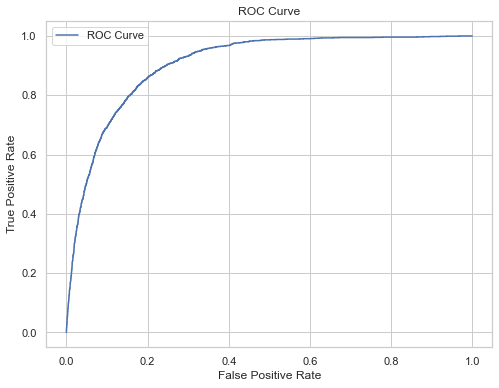

In [74]:
#log reg prediction
y_val_pred = logreg_orig.predict(X_val_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = logreg_over.predict_proba(X_val_trans)[:, 1]
roc_auc = roc_auc_score(y_val, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Testing Data**

Validation Accuracy: 0.8405572755417957
Confusion Matrix:
 [[3340  609]
 [ 112  461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      3949
           1       0.43      0.80      0.56       573

    accuracy                           0.84      4522
   macro avg       0.70      0.83      0.73      4522
weighted avg       0.90      0.84      0.86      4522

ROC AUC Score: 0.9055894593236541


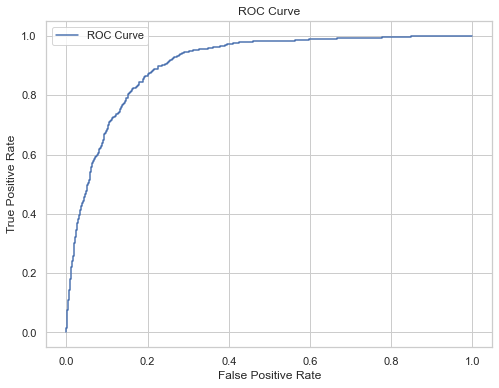

In [75]:
#log reg prediction for test data
y_test_pred = logreg_orig.predict(X_test_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = logreg_over.predict_proba(X_test_trans)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### K Nearest Neighbors

**KNN With Oversampled Dataset**

1 : 599168.8171953317
2 : 460721.97429613175
3 : 427593.02099278284
4 : 405528.2273255071
5 : 389774.75784660794
6 : 374694.8270038413
7 : 361732.6476152627
8 : 350762.36665629805
9 : 343289.0307840424


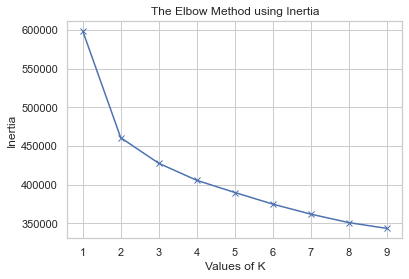

In [76]:
# using grid search to find the best k
inertia = []
mapping = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train_over,y_train_over)
    inertia.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    
    
# plotting the elbow curve

for key, val in mapping.items():
    print(f'{key} : {val}')
    
plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [77]:
# knn model
knn_over = KNeighborsClassifier(n_neighbors = 2).fit(X_train_over,y_train_over)

**Validation Data**

Validation Accuracy: 0.8810735088107351
Confusion Matrix:
 [[11384   654]
 [  959   566]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93     12038
           1       0.46      0.37      0.41      1525

    accuracy                           0.88     13563
   macro avg       0.69      0.66      0.67     13563
weighted avg       0.87      0.88      0.88     13563

ROC AUC Score: 0.7319830100855487


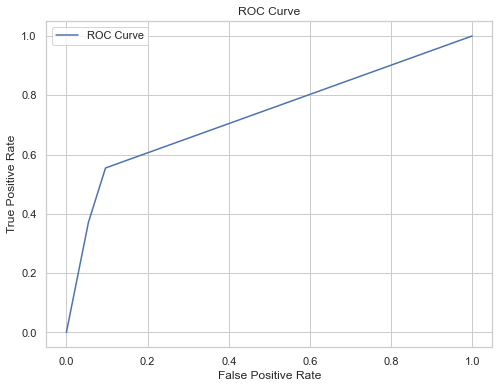

In [78]:
#knn prediction
y_val_pred = knn_over.predict(X_val_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = knn_over.predict_proba(X_val_trans)[:, 1]
roc_auc = roc_auc_score(y_val, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Test Data**

Validation Accuracy: 0.8730650154798761
Confusion Matrix:
 [[3744  205]
 [ 369  204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3949
           1       0.50      0.36      0.42       573

    accuracy                           0.87      4522
   macro avg       0.70      0.65      0.67      4522
weighted avg       0.86      0.87      0.86      4522

ROC AUC Score: 0.7202592213019666


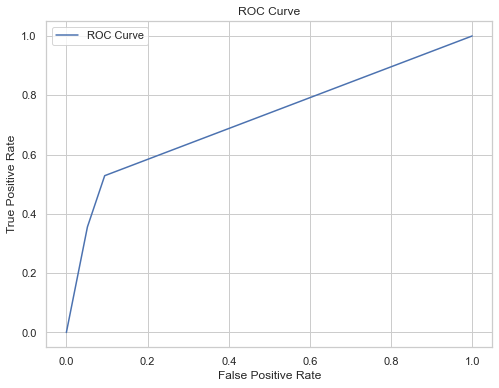

In [79]:
#log reg prediction for test data
y_test_pred = knn_over.predict(X_test_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = knn_over.predict_proba(X_test_trans)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### KNN with originial training data set

1 : 311006.28880041296
2 : 249148.16775711192
3 : 230026.9923023346
4 : 217477.80445042896
5 : 209538.67279533902
6 : 201511.77255445704
7 : 195780.7869987546
8 : 191687.51264873767
9 : 187587.1183981962


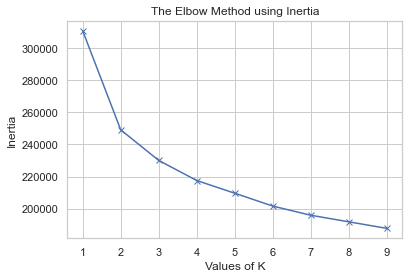

In [80]:
# using grid search to find the best k
inertia = []
mapping = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train_trans, y_train)
    inertia.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    
# plotting the elbow curve
for key, val in mapping.items():
    print(f'{key} : {val}')
    
plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [81]:
# knn model
knn_orig = KNeighborsClassifier(n_neighbors = 2).fit(X_train_trans,y_train)

**Validation Data**

Validation Accuracy: 0.8944923689449237
Confusion Matrix:
 [[11862   176]
 [ 1255   270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12038
           1       0.61      0.18      0.27      1525

    accuracy                           0.89     13563
   macro avg       0.75      0.58      0.61     13563
weighted avg       0.87      0.89      0.87     13563

ROC AUC Score: 0.7336371163446898


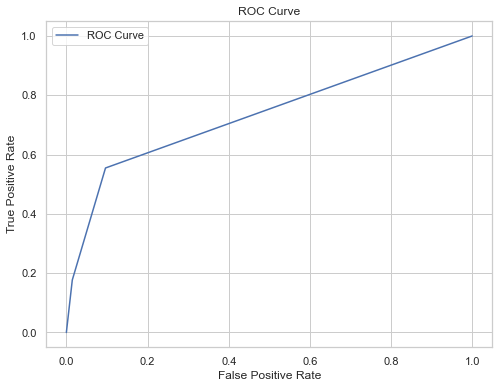

In [82]:
#knn prediction
y_val_pred = knn_orig.predict(X_val_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = knn_orig.predict_proba(X_val_trans)[:, 1]
roc_auc = roc_auc_score(y_val, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**Test Data**

Validation Accuracy: 0.883016364440513
Confusion Matrix:
 [[3907   42]
 [ 487   86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      3949
           1       0.67      0.15      0.25       573

    accuracy                           0.88      4522
   macro avg       0.78      0.57      0.59      4522
weighted avg       0.86      0.88      0.85      4522

ROC AUC Score: 0.7214469211946206


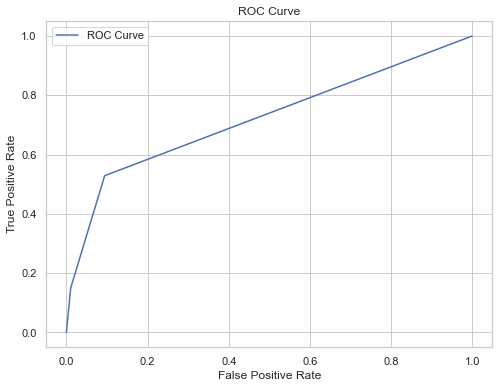

In [83]:
#log reg prediction for test data
y_test_pred = knn_orig.predict(X_test_trans)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", accuracy)

# Display confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion)

# Conduct classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# Calculate ROC AUC
y_prob = knn_orig.predict_proba(X_test_trans)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Display ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()